<img src='https://www.nimbous.co/wp-content/uploads/2019/07/scikit-learn-logo.png' />

# Predicting Heart Disease using Machine Learning

This notebook will introduce some foundation machine learning and data science concepts by exploring the problem of heart disease classification.

It is intended to be an end-to-end example of what a data science and machine learning proof of concept might look like.

## What is classification?

Classification involves deciding whether a sample is part of one class or another (single-class classification). If there are multiple class options, it's referred to as multi-class classification.

## What we'll end up with

Since we already have a dataset, we'll approach the problem with the following machine learning modelling framework.

More specifically, we'll look at the following topics:

- **Exploratory data analysis (EDA)** - the process of going through a dataset and finding out more about it.
- **Model training** - create model(s) to learn to predict a target variable based on other variables.
- **Model evaluation** - evaluating a models predictions using problem-specific evaluation metrics.
- **Model comparison** - comparing several different models to find the best one.
- **Model fine-tuning** - once we've found a good model, how can we improve it?
- **Feature importance** - since we're predicting the presence of heart disease, are there some things which are more important for prediction?
- **Cross-validation** - if we do build a good model, can we be sure it will work on unseen data?
- **Reporting what we've found** - if we had to present our work, what would we show someone?

To work through these topics, we'll use pandas, Matplotlib and NumPy for data analysis, as well as Scikit-Learn for machine learning and modelling tasks.

## Detailed Steps

### We'll work through each step and by the end of the notebook, we'll have a handful of models, all which can predict whether or not a person has heart disease based on a number of different parameters at a considerable accuracy.

You'll also be able to describe which parameters are more indicative than others, for example, sex may be more important than age.

### 1. Problem Definition

In our case, the problem we will be exploring is binary classification (a sample can only be one of two things).

This is because we're going to be using a number of different features (pieces of information) about a person to predict whether they have heart disease or not.

In a statement,

**Given clinical parameters about a patient, can we predict whether or not they have heart disease?**

### 2. Data

What you'll want to do here is dive into the data your problem definition is based on. This may involve sourcing, defining different parameters, talking to experts about it and finding out what you should expect.

The original data came from the Cleveland database from UCI Machine Learning Repository.

However, we've downloaded it in a formatted way from Kaggle.

The original database contains 76 attributes, but here only 14 attributes will be used. Attributes (also called features) are the variables what we'll use to predict our target variable.

Attributes and features are also referred to as independent variables and a target variable can be referred to as a dependent variable.

We use the independent variables to predict our dependent variable.

Or in our case, the independent variables are a patient's different medical attributes and the dependent variable is whether or not they have heart disease.

### 3. Evaluation

The evaluation metric is something you might define at the start of a project.

Since machine learning is very experimental, you might say something like,

**If we can reach 95% accuracy at predicting whether or not a patient has heart disease during the proof of concept, we'll pursue this project.**

The reason this is helpful is it provides a rough goal for a machine learning engineer or data scientist to work towards.

However, due to the nature of experimentation, the evaluation metric may change over time.

### 4. Features

Features are different parts of the data. During this step, you'll want to start finding out what you can about the data.

One of the most common ways to do this, is to create a data dictionary.

#### Heart Disease Data Dictionary

A data dictionary describes the data you're dealing with. Not all datasets come with them so this is where you may have to do your research or ask a subject matter expert (someone who knows about the data) for more.

The following are the features we'll use to predict our target variable (heart disease or no heart disease).

- `age` - age in years
- `sex` - (1 = male; 0 = female)
- `cp` - chest pain type
  - 0: Typical angina: chest pain related decrease blood supply to the heart
  - 1: Atypical angina: chest pain not related to heart
  - 2: Non-anginal pain: typically esophageal spasms (non-heart related)
  - 3: Asymptomatic: chest pain not showing signs of disease
- `trestbps` - resting blood pressure (in mm Hg on admission to the hospital)
  - anything above 130-140 is typically cause for concern
- `chol` - serum cholesterol in mg/dl
  - serum = LDL + HDL + .2 * triglycerides
  - above 200 is cause for concern
- `fbs` - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
  - '>126' mg/dL signals diabetes
- `restecg` - resting electrocardiographic results
  - 0: Nothing to note
  - 1: ST-T Wave abnormality
    - can range from mild symptoms to severe problems
    - signals non-normal heart beat
  - 2: Possible or definite left ventricular hypertrophy
    - Enlarged heart's main pumping chamber
- `thalach` - maximum heart rate achieved
- `exang` - exercise induced angina (1 = yes; 0 = no)
- `oldpeak` - ST depression induced by exercise relative to rest
  - looks at stress of heart during exercise
  - unhealthy heart will stress more
- `slope` - the slope of the peak exercise ST segment
  - 0: Upsloping: better heart rate with exercise (uncommon)
  - 1: Flatsloping: minimal change (typical healthy heart)
  - 2: Downsloping: signs of unhealthy heart
- `ca` - number of major vessels (0-3) colored by fluoroscopy
  - colored vessel means the doctor can see the blood passing through
  - the more blood movement the better (no clots)
- `thal` - thalium stress result
  - 1,3: normal
  - 6: fixed defect: used to be defect but ok now
  - 7: reversible defect: no proper blood movement when exercising
- `target` - have disease or not (1=yes, 0=no) (= the predicted attribute)

Note: No personal identifiable information (PPI) can be found in the dataset.

It's a good idea to save these to a Python dictionary or in an external file, so we can look at them later without coming back here.

### Preparing the tools

At the start of any project, it's custom to see the required libraries imported in a big chunk like you can see below.

However, in practice, your projects may import libraries as you go. After you've spent a couple of hours working on your problem, you'll probably want to do some tidying up. This is where you may want to consolidate every library you've used at the top of your notebook (like the cell below).

The libraries you use will differ from` proje`ct to project. But the`re ar`e a few which will you'll lik`ely take advantage` of during almost every structured data` project.
`
- pandas for data analysis.
- NumPy for numerical operations.
- Matplotlib/seaborn for plotting or data visualization.
- Scikit-Learn for machine learning modelling and evaluation.


In [1]:
# Regular EDA and plotting libraries
import numpy as np # np is short for numpy
import pandas as pd # pandas is so commonly used, it's shortened to pd
import matplotlib.pyplot as plt
import seaborn as sns # seaborn gets shortened to sns

# We want our plots to appear in the notebook
%matplotlib inline 

## Models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

## Model evaluators
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
# from sklearn.metrics import plot_roc_curve # note: this was changed in Scikit-Learn 1.2+ to be"RocCurveDisplay"Display" (see below)
from sklearn.metrics import RocCurveDisplay # new in Scikit-Learn 1.2+

# Print last updated
import time
print(f"Last updated: {time.asctime()}")

Last updated: Fri Jun 21 23:04:53 2024


In [2]:
df = pd.read_csv('./heart-disease.csv')
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


## Data Exploration (Exploratory Data Analysis or EDA)

Once you've imported a dataset, the next step is to explore. There's no set way of doing this. But what you should be trying to do is become more and more familiar with the dataset.

Compare different columns to each other, compare them to the target variable. Refer back to your data dictionary and remind yourself of what different columns mean.

Your goal is to become a subject matter expert on the dataset you're working with. So if someone asks you a question about it, you can give them an explanation and when you start building models, you can sound check them to make sure they're not performing too well (overfitting) or why they might be performing poorly (underfitting).

Since EDA has no real set methodology, the following is a short checklist you might want to walk through:

- What question(s) are you trying to solve (or prove wrong)?
- What kind of data do you have and how do you treat different types?
- What’s missing from the data and how do you deal with it?
- Where are the outliers and why should you care about them?
- How can you add, change or remove features to get more out of your data?

One of the quickest and easiest ways to check your data is with the `head()` function. Calling it on any dataframe will print the top 5 rows, `tail()` calls the bottom 5. You can also pass a number to them like `head(10)` to show the top 10 rows.


In [3]:
df['target'].value_counts()

target
1    165
0    138
Name: count, dtype: int64

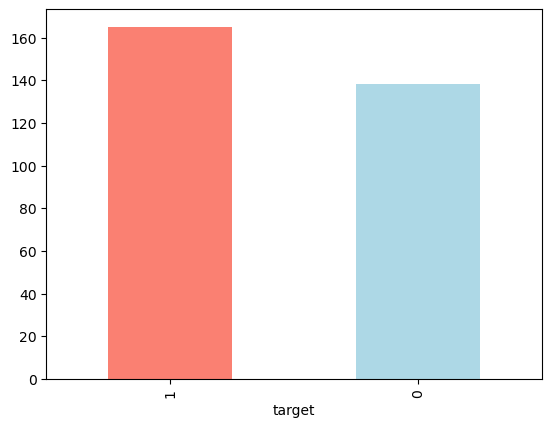

In [4]:
df['target'].value_counts().plot(kind='bar' ,color=['salmon', 'lightblue'] );

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [6]:
# Are there any missing values
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [7]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


## Heart Disease Frequency according to Gender

To compare two columns with each other, you can use the function `pd.crosstab(column_1, column_2)`. This is helpful for gaining an intuition about how your independent variables interact with your dependent variables.

Let's compare our target column with the sex column.

From our data dictionary:
- For the target column: `1 = heart disease present`, `0 = no heart disease`.
- For the sex column: `1 = male`, `0 = female`.

Using `pd.crosstab`, we can create a frequency table that shows how many males and females have heart disease and how many do not.

```python
import pandas as pd

# Assuming df is your DataFrame
pd.crosstab(df.target, df.sex)


In [8]:
df.sex.value_counts()

sex
1    207
0     96
Name: count, dtype: int64

In [9]:
# Compare target column with sex column
pd.crosstab(df.target , df.sex)

sex,0,1
target,,
0,24,114
1,72,93


## Inference from Heart Disease Frequency according to Gender

Based on our analysis of heart disease frequency by gender:

- There are approximately 100 women in our dataset, out of which 72 have been diagnosed with heart disease. This suggests that if the participant is a woman, there's a 75% chance she has heart disease.

- For males, there are about 200 in total, with roughly half indicating the presence of heart disease. Hence, if the participant is male, there's a 50% chance he will have heart disease.

By averaging these probabilities (75% for females and 50% for males), we can assume, based on gender alone and no other parameters, that there's a 62.5% chance a randomly chosen person from our dataset has heart disease.

This simple heuristic serves as our baseline prediction. The goal of our machine learning models will be to exceed this baseline accuracy.


## Visualizing Heart Disease Frequency by Gender

To visualize the comparison between heart disease frequency and gender, we can use a bar plot of the crosstab results.


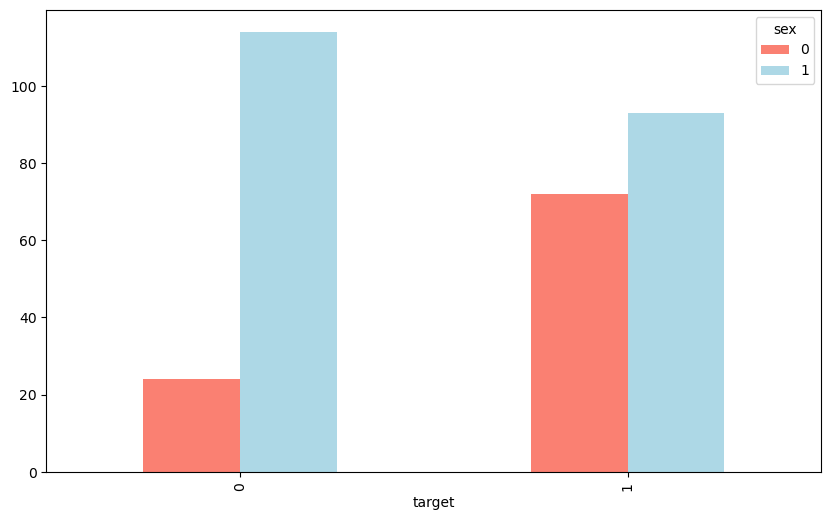

In [10]:
pd.crosstab(df.target , df.sex).plot( kind='bar' ,
                                    figsize=(10,6),
                                    color=['salmon', 'lightblue']);

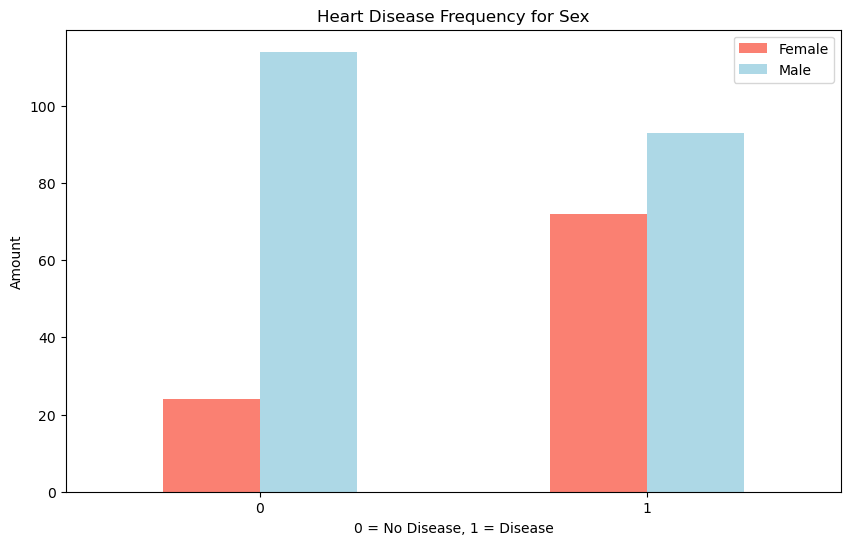

In [11]:
# Create a plot
pd.crosstab(df.target, df.sex).plot(kind="bar", figsize=(10,6), color=["salmon", "lightblue"])

# Add some attributes to it
plt.title("Heart Disease Frequency for Sex")
plt.xlabel("0 = No Disease, 1 = Disease")
plt.ylabel("Amount")
plt.legend(["Female", "Male"])
plt.xticks(rotation=0); 

In [12]:
df['thalach'].value_counts()

thalach
162    11
160     9
163     9
152     8
173     8
       ..
202     1
184     1
121     1
192     1
90      1
Name: count, Length: 91, dtype: int64

# Age vs Max Heart Rate for Heart Disease

Let's try combining a couple of independent variables, such as age and thalach (maximum heart rate), and then comparing them to our target variable, heart disease.

Because there are so many different values for age and thalach, we'll use a scatter plot.


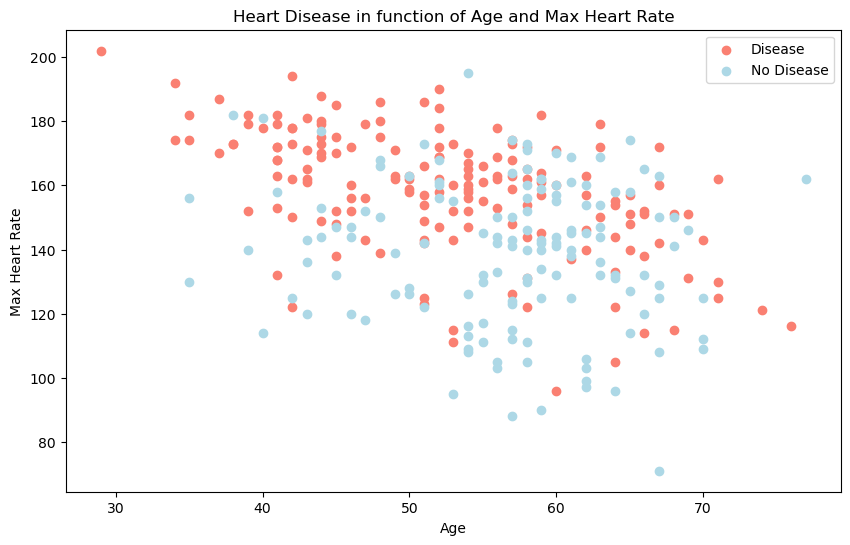

In [13]:
# Create another figure
plt.figure(figsize=(10,6))

# Start with positve examples
plt.scatter(df.age[df.target==1], 
            df.thalach[df.target==1], 
            c="salmon")

# Now for negative examples, we want them on the same plot, so we call plt again
plt.scatter(df.age[df.target==0], 
            df.thalach[df.target==0], 
            c="lightblue")

# Add some helpful info
plt.title("Heart Disease in function of Age and Max Heart Rate")
plt.xlabel("Age")
plt.legend(["Disease", "No Disease"])
plt.ylabel("Max Heart Rate");

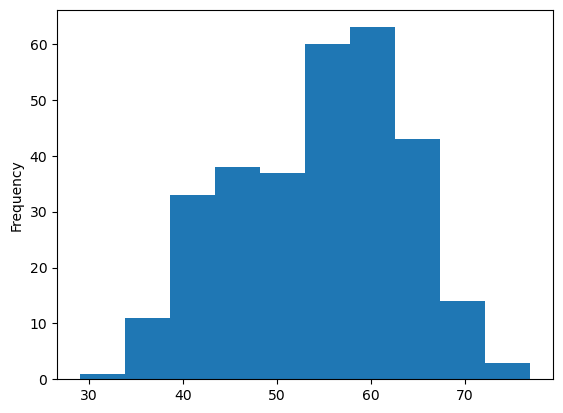

In [14]:
# Histograms are a great way to check the distribution of a variable
df.age.plot.hist();

## Heart Disease Frequency per Chest Pain Type
Let's try another independent variable. This time, `cp` (chest pain).

We'll use the same process as we did before with `sex`.
- `cp` - chest pain type
  - 0: Typical angina: chest pain related decrease blood supply to the heart
  - 1: Atypical angina: chest pain not related to heart
  - 2: Non-anginal pain: typically esophageal spasms (non-heart related)
  - 3: Asymptomatic: chest pain not showing signs of disease

In [15]:
pd.crosstab(df.cp , df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


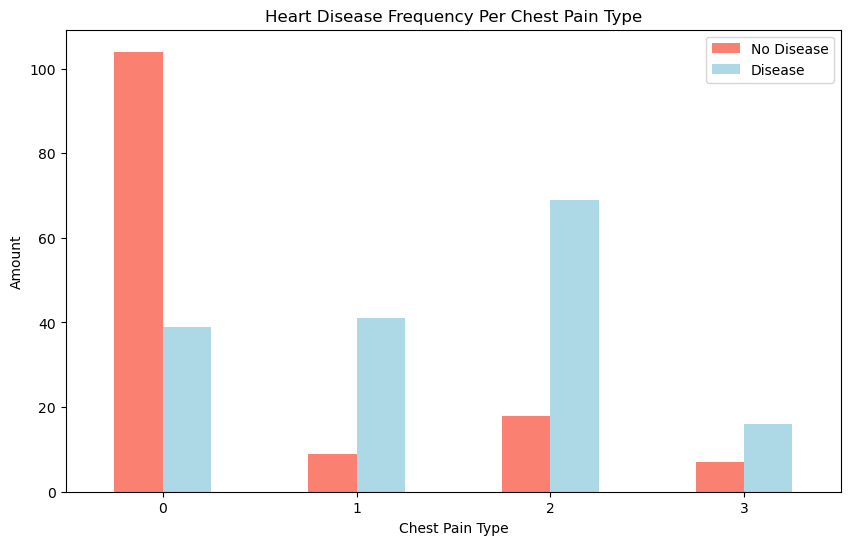

In [16]:
# Create a new crosstab and base plot 
pd.crosstab(df.cp , df.target).plot( kind='bar',
                                    figsize=(10,6),
                                   color=['salmon', 'lightblue']);
# Add attributes to the plot to make it more readable
plt.title('Heart Disease Frequency Per Chest Pain Type')
plt.xlabel('Chest Pain Type')
plt.ylabel('Amount')
plt.legend(["No Disease", "Disease"])
plt.xticks(rotation = 0);

# Correlation between independent variables

Finally, we'll compare all of the independent variables in one hit.

Why?

Because this may give an idea of which independent variables may or may not have an impact on our target variable.

We can do this using `df.corr()` which will create a correlation matrix for us, in other words, a big table of numbers telling us how related each variable is to the other.


In [17]:
# Find the correlation between our independent variables
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


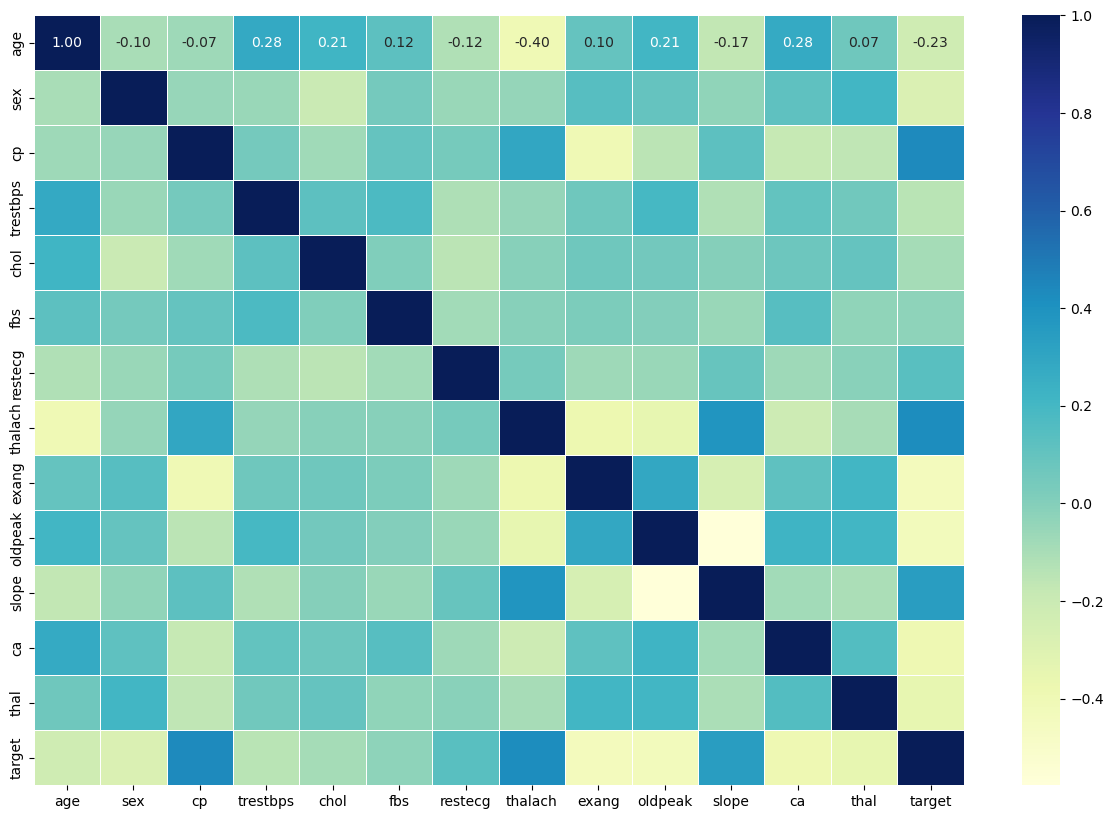

In [18]:
# Let's make it look a little prettier
corr_matrix = df.corr()
fig , ax = plt.subplots(figsize=(15,10))
ax = sns.heatmap(corr_matrix ,
                annot=True,
                linewidths=0.5,
                fmt='.2f',
                cmap='YlGnBu');

# Enough EDA, let's model

Remember, we do exploratory data analysis (EDA) to start building an intuition of the dataset.

What have we learned so far? Aside from our baseline estimate using sex, the rest of the data seems to be pretty distributed.

So what we'll do next is model-driven EDA, meaning, we'll use machine learning models to drive our next questions.

A few extra things to remember:

- Not every EDA will look the same, what we've seen here is an example of what you could do for structured, tabular datasets.
- You don't necessarily have to do the same plots as we've done here, there are many more ways to visualize data. I encourage you to look at more.
- We want to quickly find:
  - Distributions (`df.column.hist()`)
  - Missing values (`df.info()`)
  - Outliers

Let's build some models.


# Modeling

We've explored the data, now we'll try to use machine learning to predict our target variable based on the 13 independent variables.

Remember our problem?

Given clinical parameters about a patient, can we predict whether or not they have heart disease?

That's what we'll be trying to answer.

And remember our evaluation metric?

If we can reach **95% accuracy** at predicting whether or not a patient has heart disease during the proof of concept, we'll pursue this project.

That's what we'll be aiming for.

But before we build a model, we have to get our dataset ready.

Let's look at it again.


In [19]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [20]:
# Everything except target variable
x = df.drop('target' , axis=1)
y = df['target']

In [21]:
x

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [22]:
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

## Training and Test Split

One of the most important concepts in machine learning is the training/test split. This is where you divide your data into two subsets:

* **Training set:** Used to train your machine learning model.
* **Test set:** Used to evaluate the performance of your trained model on unseen data.

The test set is crucial because it simulates how your model will perform in a real-world scenario with new data it hasn't encountered during training.  

Here's why you shouldn't use all your data for training:

Imagine training a medical diagnosis model using your entire dataset. If you then deploy this model to a hospital, how would you know how well it performs on new patients whose data wasn't included in the original training data?

The test set helps address this by mimicking a real-world environment. It's essential to keep the test set separate from the training set to ensure unbiased evaluation. 

We can use Scikit-Learn's `train_test_split()` function to split our data into training and test sets. This function requires both your independent variables `(X)` and dependent variables `(y)` as input.


In [23]:
# split data into train and test set 
np.random.seed(42)
# split into train & test set 
x_train , x_test , y_train , y_test = train_test_split( x ,
                                                      y ,
                                                      test_size=0.2)


## The `test_size` parameter is used to tell the `train_test_split()` function how much of our data we want in the test set.

A rule of thumb is to use 80% of your data to train on and the other 20% to test on.


For our problem, a train and test set are enough. But for other problems, you could also use a validation (train/validation/test) set or cross-validation (we'll see this in a second).


But again, each problem will differ. The post, [How (and why) to create a good validation set](https://www.fast.ai/2017/11/13/validation-sets/) by Rachel Thomas is a good place to go to learn more.


Let's look at our training data.


In [24]:
x_train.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
132,42,1,1,120,295,0,1,162,0,0.0,2,0,2
202,58,1,0,150,270,0,0,111,1,0.8,2,0,3
196,46,1,2,150,231,0,1,147,0,3.6,1,0,2
75,55,0,1,135,250,0,0,161,0,1.4,1,0,2
176,60,1,0,117,230,1,1,160,1,1.4,2,2,3


In [25]:
y_train, len(y_train)

(132    1
 202    0
 196    0
 75     1
 176    0
       ..
 188    0
 71     1
 106    1
 270    0
 102    1
 Name: target, Length: 242, dtype: int64,
 242)

# Model choices
#### Now we've got our data prepared, we can start to fit models. We'll be using the following and comparing their results.

- Logistic Regression - `LogisticRegression()`
- K-Nearest Neighbors - `KNeighboursClassifier()`
- RandomForest - `RandomForestClassifier()`

### Why these?


If we look at the Scikit-Learn algorithm cheat sheet, we can see we're working on a classification problem and these are the algorithms it suggests (plus a few more)

![Alt text](./ml_map.svg)
.

## "Wait, I don't see Logistic Regression and why not use LinearSVC?"

Good questions.

I was confused too when I didn't see Logistic Regression listed as well because when you read the Scikit-Learn documentation on it, you can see it's a model for classification.

And as for LinearSVC, let's pretend we've tried it, and it doesn't work, so we're following other options in the map.

For now, knowing each of these algorithms inside and out is not essential.

Machine learning and data science is an iterative practice. These algorithms are tools in your toolbox.

In the beginning, on your way to becoming a practitioner, it's more important to understand your problem (such as, classification versus regression) and then knowing what tools you can use to solve it.

Since our dataset is relatively small, we can experiment to find which algorithm performs best.

All of the algorithms in the Scikit-Learn library use the same functions, for training a model, `model.fit(X_train, y_train)` and for scoring a model `model.score(X_test, y_test)`. `score()` returns the ratio of correct predictions (1.0 = 100% correct).

Since the algorithms we've chosen implement the same methods for fitting them to the data as well as evaluating them, let's put them in a dictionary and create a loop which fits and scores them.


In [26]:
# Put models in a dictionary
models = { "Logistic Regression": LogisticRegression() ,
         "KNN": KNeighborsClassifier(),
         "Random Forest" : RandomForestClassifier() }

## create a function to fit and score models
def fit_and_score( models , x_train , x_test , y_train , y_test ):
    """
    Fits and evaluates given machine learning models.
    models : a dict of different Scikit-Learn machine learning models
    X_train : training data
    X_test : testing data
    y_train : labels assosciated with training data
    y_test : labels assosciated with test data
    """
    # set random seed 
    np.random.seed(42)
    # make a dictinary to keep model score
    model_scores={}
    #loop through models
    for name , model in models.items():
        # fit the model to the data 
        model.fit(x_train , y_train)
        # Evaluate the model and append its score to model_scores
        model_scores[name] = model.score(x_test , y_test)
    return model_scores

In [27]:
# Fits and evaluates given machine learning models.
model_scores = fit_and_score( models = models,
                            x_train=x_train,
                            x_test=x_test,
                            y_train=y_train,
                            y_test=y_test)
model_scores

C:\Users\aliab\OneDrive\Desktop\xray\env\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.8360655737704918}

## Model Comparison
Since we've saved our models scores to a dictionary, we can plot them by first converting them to a DataFrame.

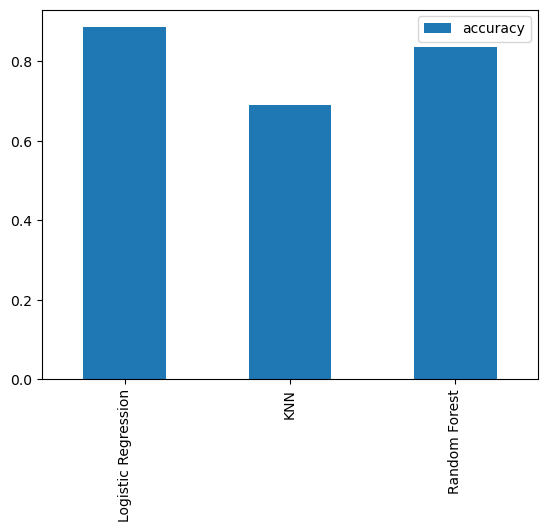

In [28]:
model_compare = pd.DataFrame( model_scores , index=['accuracy'] )
model_compare.T.plot.bar();

Let's briefly go through each before we see them in action.

### Hyperparameter Tuning
Each model you use has a series of dials you can turn to dictate how they perform. Changing these values may increase or decrease model performance.

### Feature Importance
If there are a large number of features we're using to make predictions, do some have more importance than others? For example, for predicting heart disease, which is more important, sex or age?

### Confusion Matrix
Compares the predicted values with the true values in a tabular way. If 100% correct, all values in the matrix will be from the top left to bottom right (diagonal line).

### Cross-Validation
Splits your dataset into multiple parts, trains and tests your model on each part, and evaluates performance as an average.

### Precision
Proportion of true positives over the total number of positive predictions. Higher precision leads to fewer false positives.

### Recall
Proportion of true positives over the total number of true positives and false negatives. Higher recall leads to fewer false negatives.

### F1 Score
Combines precision and recall into one metric. 1 is best, 0 is worst.

### Classification Report
Scikit-Learn has a built-in function called `classification_report()` which returns some of the main classification metrics such as precision, recall, and F1 score.

### ROC Curve
Receiver Operating Characteristic is a plot of true positive rate versus false positive rate.

### Area Under Curve (AUC)
The area underneath the ROC curve. A perfect model achieves a score of 1.0.


## Hyperparameter Tuning and Cross-Validation

To cook your favorite dish, you know to set the oven to 180 degrees and turn the grill on. But when your roommate cooks their favorite dish, they use 200 degrees and the fan-forced mode. Same oven, different settings, different outcomes.

The same can be done for machine learning algorithms. You can use the same algorithms but change the settings (hyperparameters) and get different results.

But just like turning the oven up too high can burn your food, the same can happen for machine learning algorithms. You change the settings and it works so well, it overfits (does too well) the data.

We're looking for the Goldilocks model: one which does well on our dataset but also does well on unseen examples.

To test different hyperparameters, you could use a validation set but since we don't have much data, we'll use cross-validation.

### Cross-Validation

The most common type of cross-validation is k-fold. It involves splitting your data into k folds and then testing a model on each. For example, let's say we had 5 folds (k = 5). This is what it might look like:

![Normal train and test split versus 5-fold cross-validation](https://raw.githubusercontent.com/mrdbourke/zero-to-mastery-ml/14e48b3e8f27465214e9eb8b59d09f3943dd20cd/images/sklearn-cross-validation.png)

### Normal Train and Test Split Versus 5-Fold Cross-Validation

We'll be using this setup to tune the hyperparameters of some of our models and then evaluate them. We'll also get a few more metrics like precision, recall, F1-score, and ROC at the same time.

### Here's the Game Plan:

1. **Tune model hyperparameters and see which performs best**
2. **Perform cross-validation**
3. **Plot ROC curves**
4. **Make a confusion matrix**
5. **Get precision, recall, and F1-score metrics**
6. **Find the most important model features**


## Tuning KNeighborsClassifier (K-Nearest Neighbors or KNN) by Hand

There's one main hyperparameter we can tune for the K-Nearest Neighbors (KNN) algorithm, and that is the number of neighbors. The default is 5 (`n_neighbors=5`).

### What are Neighbors?

Imagine all our different samples on one graph, like the scatter graph we have above. KNN works by assuming dots which are closer together belong to the same class. If `n_neighbors=5`, then it assumes a dot with the 5 closest dots around it are in the same class.

We've left out some details here like what defines "close" or how distance is calculated, but I encourage you to research them.

For now, let's try a few different values of `n_neighbors`.

In [29]:
# Create a list of train scores
train_scores = []

# Create a list of test scores
test_scores = []

# Create a list of different values for n_neighbors
neighbors = range(1, 21) # 1 to 20

# Setup algorithm
knn = KNeighborsClassifier()

# Loop through different neighbors values
for i in neighbors:
    knn.set_params(n_neighbors = i) # set neighbors value
    
    # Fit the algorithm
    knn.fit(x_train, y_train)
    
    # Update the training scores
    train_scores.append(knn.score(x_train, y_train))
    
    # Update the test scores
    test_scores.append(knn.score(x_test, y_test))

In [30]:
train_scores

[1.0,
 0.8099173553719008,
 0.7727272727272727,
 0.743801652892562,
 0.7603305785123967,
 0.7520661157024794,
 0.743801652892562,
 0.7231404958677686,
 0.71900826446281,
 0.6942148760330579,
 0.7272727272727273,
 0.6983471074380165,
 0.6900826446280992,
 0.6942148760330579,
 0.6859504132231405,
 0.6735537190082644,
 0.6859504132231405,
 0.6652892561983471,
 0.6818181818181818,
 0.6694214876033058]

Maximum KNN score on the test data: 75.41%


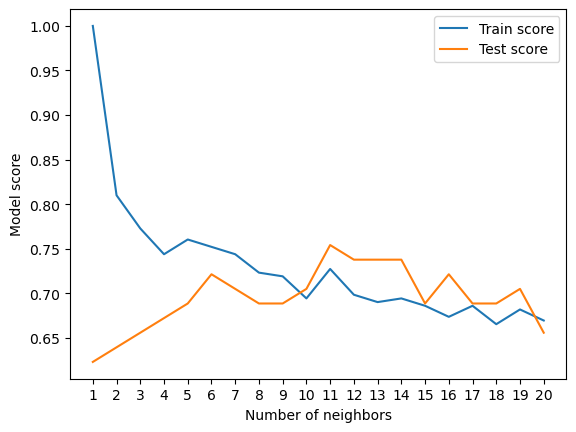

In [31]:
plt.plot(neighbors, train_scores, label="Train score")
plt.plot(neighbors, test_scores, label="Test score")
plt.xticks(np.arange(1, 21, 1))
plt.xlabel("Number of neighbors")
plt.ylabel("Model score")
plt.legend()

print(f"Maximum KNN score on the test data: {max(test_scores)*100:.2f}%")

Looking at the graph, `n_neighbors = 11` seems best.

Even knowing this, the KNN's model performance didn't get near what `LogisticRegression` or the `RandomForestClassifier` did.

Because of this, we'll discard KNN and focus on the other two.

We've tuned KNN by hand but let's see how we can tune `LogisticRegression` and `RandomForestClassifier` using `RandomizedSearchCV`.

Instead of us having to manually try different hyperparameters by hand, `RandomizedSearchCV` tries a number of different combinations, evaluates them, and saves the best.


## Tuning Models with RandomizedSearchCV

Reading the Scikit-Learn documentation for `LogisticRegression`, we find there's a number of different hyperparameters we can tune. The same is true for `RandomForestClassifier`.

Let's create a hyperparameter grid (a dictionary of different hyperparameters) for each and then test them out using `RandomizedSearchCV`.


In [32]:
# Different LogisticRegression hyperparameters
log_reg_grid = {'C': np.logspace(-4, 4, 20), # Return numbers spaced evenly on a log scale.
                'solver': ['liblinear']}

# Different RandomForestClassifier hyperparameters
rf_grid = {
    "n_estimators": np.arange(10, 1000, 50),
    "max_depth": [None, 3, 5, 10],
    "min_samples_split": np.arange(2, 20, 2),
    "min_samples_leaf": np.arange(1, 20, 2)
}

In [33]:
# Set a random seed
np.random.seed(42)

# Setup random hyperparameter search for LogisticRegression
rs_log_reg = RandomizedSearchCV(
    LogisticRegression(),
    param_distributions=log_reg_grid,
    cv=5,
    n_iter=20,
    verbose=True
)

# Assuming x_train and y_train are already defined
# Fit random hyperparameter search model
rs_log_reg.fit(x_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [34]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [35]:
rs_log_reg.score(x_test , y_test)

0.8852459016393442

Now we've tuned `LogisticRegression` using `RandomizedSearchCV`, we'll do the same for `RandomForestClassifier`.

In [36]:
# set random seed 
np.random.seed(42)
# Setup random hyperparameter search for RandomForestClassifier
rs_rf= RandomizedSearchCV( RandomForestClassifier(),
                          param_distributions=rf_grid,
                          cv=5,
                          n_iter=20,
                          verbose=True)
# Fit random hyperparameter search model for RandomForestClassifier()
rs_rf.fit(x_train , y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [37]:
# Find the best parameters
rs_rf.best_params_

{'n_estimators': 210,
 'min_samples_split': 4,
 'min_samples_leaf': 19,
 'max_depth': 3}

In [38]:
# Evaluate the randomized search random forest model
rs_rf.score(x_test , y_test)

0.8688524590163934

In [39]:
model_scores

{'Logistic Regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.8360655737704918}

## Tuning a Model with GridSearchCV

The difference between `RandomizedSearchCV` and `GridSearchCV` is that while `RandomizedSearchCV` searches over a grid of hyperparameters performing `n_iter` combinations, `GridSearchCV` will test every single possible combination.

In short:

- **RandomizedSearchCV**: Tries `n_iter` combinations of hyperparameters and saves the best.
- **GridSearchCV**: Tries every single combination of hyperparameters and saves the best.

Let's see it in action.

In [40]:
# Different LogisticRegression hyperparameters
log_reg_grid = {"C": np.logspace(-4, 4, 20),
                "solver": ["liblinear"]}
# Setup grid hyperparameter search for LogisticRegression
gs_log_reg = GridSearchCV(LogisticRegression(),
                          param_grid=log_reg_grid,
                          cv=5,
                          verbose=True)

# Fit grid hyperparameter search model
gs_log_reg.fit(x_train, y_train);

Fitting 5 folds for each of 20 candidates, totalling 100 fits


In [41]:
# Check the best parameters
gs_log_reg.best_params_

{'C': 0.23357214690901212, 'solver': 'liblinear'}

In [42]:
# Evaluate the model
gs_log_reg.score(x_test, y_test)

0.8852459016393442

#  Evaluating a classification model, beyond accuracy:

1. **ROC Curve and AUC Score (Area Under the Curve)**:
   - The Receiver Operating Characteristic (ROC) curve is a graphical representation of the model's performance across different thresholds.
   - The AUC score quantifies the overall performance of the model in distinguishing between positive and negative samples.
   - To create the ROC curve, follow these steps:
     - Make predictions on the test set using your tuned model.
     - Compute the false positive rate (FPR) and true positive rate (TPR) for different threshold values.
     - Plot the ROC curve using `sklearn.metrics.RocCurveDisplay`.
     - Calculate the AUC score using `sklearn.metrics.roc_auc_score`.

2. **Confusion Matrix**:
   - The confusion matrix provides a detailed breakdown of true positives, true negatives, false positives, and false negatives.
   - To compute the confusion matrix:
     - Make predictions on the test set.
     - Use `sklearn.metrics.confusion_matrix` to get the matrix.

3. **Classification Report**:
   - The classification report summarizes precision, recall, F1-score, and support for each class.
   - To generate the classification report:
     - Again, make predictions on the test set.
     - Use `sklearn.metrics.classification_report`.

4. **Precision, Recall, and F1-Score**:
   - These metrics provide insights into the model's performance for positive class predictions.
   - Precision: Proportion of true positive predictions among all positive predictions.
   - Recall: Proportion of true positive predictions among all actual positive samples.
   - F1-score: Harmonic mean of precision and recall.
   - Calculate these using `sklearn.metrics.precision_score`, `sklearn.metrics.recall_score`, and `sklearn.metrics.f1_score`.

 

In [44]:
# Make preidctions on test data
y_preds = gs_log_reg.predict(x_test)
y_preds

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [45]:
y_test

179    0
228    0
111    1
246    0
60     1
      ..
249    0
104    1
300    0
193    0
184    0
Name: target, Length: 61, dtype: int64

# ROC Curve and AUC Scores

## What's a ROC curve?

It's a way of understanding how your model is performing by comparing the true positive rate to the false positive rate.

## In our case...

To get an appropriate example in a real-world problem, consider a diagnostic test that seeks to determine whether a person has a certain disease. A false positive in this case occurs when the person tests positive but does not actually have the disease. A false negative, on the other hand, occurs when the person tests negative, suggesting they are healthy, when they actually do have the disease.

Scikit-Learn implements a function `RocCurveDisplay` (previously called `plot_roc_curve` in Scikit-Learn versions > 1.2) which can help us create a ROC curve as well as calculate the area under the curve (AUC) metric.

Reading the documentation on the `RocCurveDisplay` function we can see it has a class method called `from_estimator(estimator, X, y)` as inputs.

Where `estimator` is a fitted machine learning model and `X` and `y` are the data you'd like to test it on.

In our case, we'll use the `GridSearchCV` version of our `LogisticRegression` estimator, `gs_log_reg` as well as the test data, `X_test` and `y_test`.


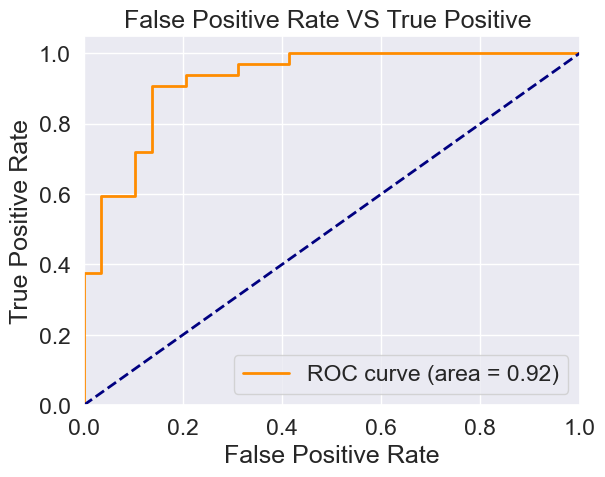

AUC: 0.9245689655172414


In [56]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Predict probabilities
y_prob = gs_log_reg.predict_proba(x_test)[:, 1]

# Compute ROC curve and ROC area
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('False Positive Rate VS True Positive ')
plt.legend(loc="lower right")
plt.show()

# Print AUC value
print(f'AUC: {roc_auc}')

# Confusion matrix
A confusion matrix is a visual way to show where your model made the right predictions and where it made the wrong predictions (or in other words, got confused).

Scikit-Learn allows us to create a confusion matrix using `confusion_matrix()` and passing it the true labels and predicted labels.

In [51]:
# Display confusion matrix
print(confusion_matrix(y_test, y_preds))

[[25  4]
 [ 3 29]]


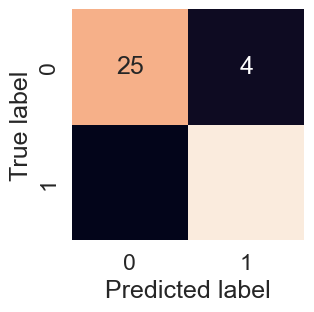

In [55]:
# Import Seaborn
import seaborn as sns
sns.set(font_scale=1.5) # Increase font size
 
def plot_conf_mat(y_test, y_preds):
    """
    Plots a confusion matrix using Seaborn's heatmap().
    """
    fig, ax = plt.subplots(figsize=(3, 3))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                     annot=True, # Annotate the boxes
                     cbar=False)
    plt.xlabel("Predicted label") # predictions go on the x-axis
    plt.ylabel("True label") # true labels go on the y-axis 
    
    
plot_conf_mat(y_test, y_preds)

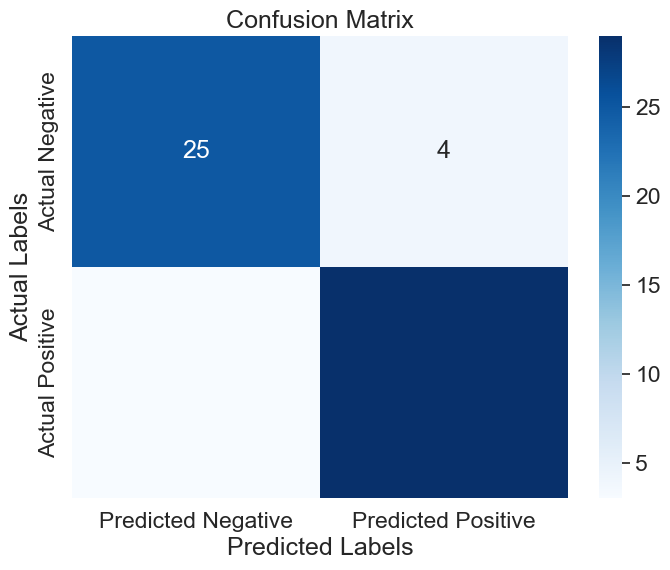

In [53]:
# another way 
cm = confusion_matrix(y_test, y_preds)

# Create a dataframe for better visualization
cm_df = pd.DataFrame(cm, index=['Actual Negative', 'Actual Positive'], columns=['Predicted Negative', 'Predicted Positive'])

# Plot the confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm_df, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
plt.show()

# Classification Report

We can make a classification report using `classification_report()` and passing it the true labels as well as our model's predicted labels.

A classification report will also give us information on the precision and recall of our model for each class.


In [57]:
# Show classification report
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



# What's Going on Here?

Let's get a refresh.

### Precision
Indicates the proportion of positive identifications (model predicted class 1) which were actually correct. A model which produces no false positives has a precision of 1.0.

### Recall
Indicates the proportion of actual positives which were correctly classified. A model which produces no false negatives has a recall of 1.0.

### F1 Score
A combination of precision and recall. A perfect model achieves an F1 score of 1.0.

### Support
The number of samples each metric was calculated on.

### Accuracy
The accuracy of the model in decimal form. Perfect accuracy is equal to 1.0.

### Macro Avg
Short for macro average, the average precision, recall, and F1 score between classes. Macro avg doesn’t take class imbalance into account, so if you do have class imbalances, pay attention to this metric.

### Weighted Avg
Short for weighted average, the weighted average precision, recall, and F1 score between classes. Weighted means each metric is calculated with respect to how many samples there are in each class. This metric will favor the majority class (e.g., will give a high value when one class outperforms another due to having more samples).

Ok, now we've got a few deeper insights into our model. But these were all calculated using a single training and test set.

## What We'll Do Next

To make them more solid, we'll calculate them using cross-validation.

### How?

We'll take the best model along with the best hyperparameters and use `cross_val_score()` along with various scoring parameter values.

`cross_val_score()` works by taking an estimator (machine learning model) along with data and labels. It then evaluates the machine learning model on the data and labels using cross-validation and a defined scoring parameter.

Let's remind ourselves of the best hyperparameters and then see them in action.


In [58]:
# Check best hyperparameters
gs_log_reg.best_params_

{'C': 0.23357214690901212, 'solver': 'liblinear'}

In [59]:
# Import cross_val_score
from sklearn.model_selection import cross_val_score

# Instantiate best model with best hyperparameters (found with GridSearchCV)
clf = LogisticRegression(C=0.23357214690901212,
                         solver="liblinear")

In [60]:
# Cross-validated accuracy score
cv_acc = cross_val_score(clf ,
                         x,
                         y,
                         cv=5,
                         scoring='accuracy')
cv_acc

array([0.81967213, 0.90163934, 0.8852459 , 0.88333333, 0.75      ])

In [62]:
cv_acc=  np.mean(cv_acc)
cv_acc

0.8479781420765027

In [64]:
# Cross-validated precision score
cv_precision = np.mean(cross_val_score(clf,
                                       x,
                                       y,
                                       cv=5, # 5-fold cross-validation
                                       scoring="precision")) # precision as scoring
cv_precision

0.8215873015873015

In [66]:
# Cross-validated recall score
cv_recall = np.mean(cross_val_score(clf,
                                    x,
                                    y,
                                    cv=5, # 5-fold cross-validation
                                    scoring="recall")) # recall as scoring
cv_recall

0.9272727272727274

In [67]:
# Cross-validated F1 score
cv_f1 = np.mean(cross_val_score(clf,
                                x,
                                y,
                                cv=5, # 5-fold cross-validation
                                scoring="f1")) # f1 as scoring
cv_f1

0.8705403543192143

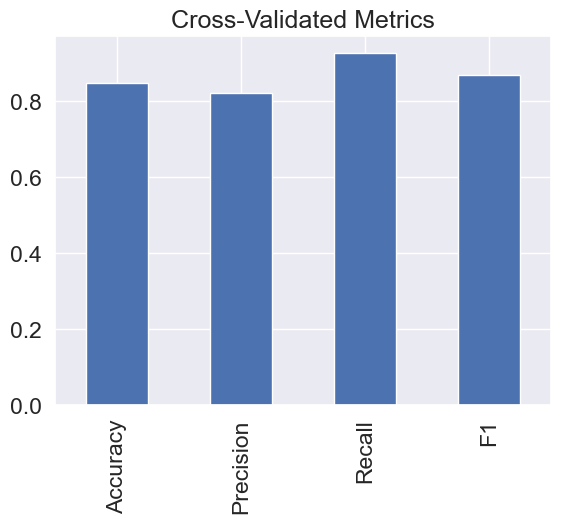

In [71]:
# Visualizing cross-validated metrics
cv_metrics = pd.DataFrame({"Accuracy": cv_acc,
                            "Precision": cv_precision,
                            "Recall": cv_recall,
                            "F1": cv_f1},
                          index=[0])
cv_metrics.T.plot.bar(title="Cross-Validated Metrics", legend=False);

# Great! This looks like something we could share.

An extension might be adding the metrics on top of each bar so someone can quickly tell what they were.

## What Now?

The final thing to check off the list of our model evaluation techniques is feature importance.

## Feature Importance

Feature importance is another way of asking, "which features contribute most to the outcomes of the model?"

Or for our problem, trying to predict heart disease using a patient's medical characteristics, which characteristics contribute most to a model predicting whether someone has heart disease or not?

Unlike some of the other functions we've seen, because how each model finds patterns in data is slightly different, how a model judges how important those patterns are is different as well. This means for each model, there's a slightly different way of finding which features were most important.

You can usually find an example via the Scikit-Learn documentation or via searching for something like "[MODEL TYPE] feature importance", such as, "random forest feature importance".

Since we're using `LogisticRegression`, we'll look at one way we can calculate feature importance for it.

To do so, we'll use the `coef_` attribute. Looking at the Scikit-Learn documentation for `LogisticRegression`, the `coef_` attribute is the coefficient of the features in the decision function.

We can access the `coef_` attribute after we've fit an instance of `LogisticRegression`.


In [73]:
# Fit an instance of LogisticRegression (taken from above)
clf.fit(x_train , y_train)

LogisticRegression(C=0.23357214690901212, solver='liblinear')

In [74]:
# Check coef_
clf.coef_

array([[ 0.00369922, -0.90424087,  0.67472828, -0.0116134 , -0.00170364,
         0.04787689,  0.33490186,  0.02472938, -0.63120403, -0.57590919,
         0.4709512 , -0.6516535 , -0.69984202]])

Looking at this it might not make much sense. But these values are how much each feature contributes to how a model makes a decision on whether patterns in a sample of patients health data leans more towards having heart disease or not.

Even knowing this, in it's current form, this `coef_` array still doesn't mean much. But it will if we combine it with the columns (features) of our dataframe.

In [75]:
# Match features to columns
features_dict = dict(zip(df.columns, list(clf.coef_[0])))
features_dict

{'age': 0.003699219011760782,
 'sex': -0.9042408714480176,
 'cp': 0.6747282766540338,
 'trestbps': -0.01161340334265323,
 'chol': -0.0017036446360052262,
 'fbs': 0.04787688669240361,
 'restecg': 0.3349018562558094,
 'thalach': 0.024729384743360134,
 'exang': -0.631204028843173,
 'oldpeak': -0.575909185434028,
 'slope': 0.47095119664446533,
 'ca': -0.6516535002884537,
 'thal': -0.6998420233395882}

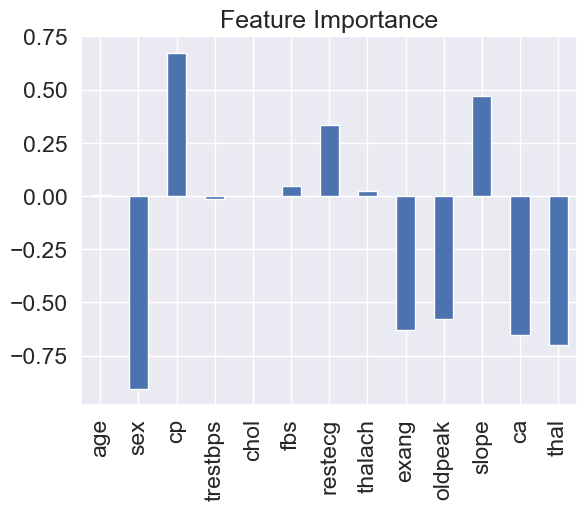

In [77]:
# Visualize feature importance
features_df = pd.DataFrame(features_dict , index=[0])
features_df.T.plot.bar(title='Feature Importance' ,legend=False );

You'll notice some are negative and some are positive.

The larger the value (bigger bar), the more the feature contributes to the models decision.

If the value is negative, it means there's a negative correlation. And vice versa for positive values.

For example, the sex attribute has a negative value of -0.904, which means as the value for sex increases, the target value decreases.

We can see this by comparing the sex column to the target column.

In [78]:
pd.crosstab(df["sex"], df["target"])

target,0,1
sex,,
0,24,72
1,114,93


You can see, when sex is 0 (female), there are almost 3 times as many (72 vs. 24) people with heart disease (target = 1) than without.

And then as sex increases to 1 (male), the ratio goes down to almost 1 to 1 (114 vs. 93) of people who have heart disease and who don't.

What does this mean?

It means the model has found a pattern which reflects the data. Looking at these figures and this specific dataset, it seems if the patient is female, they're more likely to have heart disease.

How about a positive correlation?

In [79]:
# Contrast slope (positive coefficient) with target
pd.crosstab(df["slope"], df["target"])

target,0,1
slope,,
0,12,9
1,91,49
2,35,107


# Summary of Model Evaluation for Heart Disease Prediction

## Insights from Metrics and Analysis

### Feature Importance

- The slope of the peak exercise ST segment shows a positive correlation (0.470) with the target variable, indicating that as slope increases, the likelihood of heart disease also increases.
- This finding aligns with the cross-tabulation (`pd.crosstab(df["slope"], df["target"]`), which demonstrates a clear trend of increasing target values as slope increases.

### Engagement with Subject Matter Experts

- Consulting with subject matter experts is crucial to interpret correlations and feature importance correctly.
- Experts can provide insights into where the model finds significant patterns and where it struggles, helping to refine model understanding and feature selection.

### Experimentation and Iteration

- The entire process of model evaluation, from trying different algorithms to tuning hyperparameters, constitutes experimentation.
- Although the model did not achieve the target 95% accuracy threshold during this proof of concept, valuable insights were gained.
- This outcome guides the next steps: exploring additional data collection, experimenting with more advanced models like CatBoost or XGBoost, or further optimizing the current model approach.

### Reflections on Next Steps

- Failure to meet the accuracy metric does not invalidate the efforts; instead, it provides clarity on what doesn't work in the current context.
- Step 6, experimentation, remains pivotal. It involves exploring alternative approaches, improving existing models, or determining how to deploy and share the model effectively.

## Conclusion

The iterative nature of machine learning experimentation underscores the importance of continuous learning and adaptation. Each experiment informs the next steps, guiding towards improved models and insights in predictive analytics for heart disease diagnosis.
